In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sympy import symbols, diff, solve, var
import scipy.stats as ss

# Contents

[1. Probability basics](#1.-Probability-basics)

[2. Probability distributions](#2.-Probability-distributions)

[3. Statistics](#3.-Statistics)

[4. Maximum Likelihood](#4.-Maximum-Likelihood)

[5. Baye's theorem](#5.-Baye's-theorem)
   

# References

- Downey, Allen B. ["Think Bayes: Bayesian Statistics in Python."](https://www.amazon.com/Think-Bayes-Bayesian-Statistics-Python-ebook-dp-B00F5BS96Q/dp/B00F5BS96Q/ref=mt_kindle?_encoding=UTF8&me=&qid=) *Green Tea Press*


- Hamilton, J. D. ["Time series analysis."](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896) *Princeton University.*


- Knudson, Christina. [Maximum Likelihood Estimation](https://www.youtube.com/playlist?list=PLdxWrq0zBgPXWD7_sc7uf8BdirORFRA2-)


- Lambert, Ben. [A Student's Guide to Bayesian Statistics](https://www.youtube.com/playlist?list=PLwJRxp3blEvZ8AKMXOy0fc0cqT61GsKCG)


- Rozanov, Y. A. (1977). [Probability theory: a concise course.](https://www.amazon.com/Probability-Theory-Concise-Course-Mathematics/dp/0486635449) New York: Dover.


- Shanker, Tushar. Statistical simulation in python. [Datacamp](https://www.datacamp.com/courses/statistical-simulation-in-python)


- Tseng, Francis [AI Notes](https://frnsys.com/ai_notes/foundations/probability.html)


# 1. Probability basics

## 1.1 Probability space 

Defined by triple $(\Omega, \mathcal F, P)$ where:

1. $\Omega$ is the space of possible outcomes.

2. $\mathcal F \subseteq 2^{\Omega}$ where $2^{\Omega}$ is the power set of $\Omega$ 

    - i.e. the set of all subsets of $\Omega$, including the empty set $\emptyset$ and $\Omega$ itself, the latter of which is called the trivial event), is the space of measurable events or the event space.

3. $P$ is the probability measure. 
    - i.e. the probability distribution, that maps an event $E \in \mathcal F$ to a real value between 0 and 1 (that is, $P$ is a function that outputs a probability for the input event).
    

### 1.1.2 Example: Probability space

Six sided dice, we want to find out whether or not the dice roll is odd or even.

- Space of possible outcomes $\Omega = {1,2,3,4,5,6}$. 

 - Event space is $\mathcal F = \{\emptyset, {1,3,5}, {2,4,6}, \Omega\}$.

## 1.2 Random variables

- A random variable can also be referred to as a stochastic variable
- It is a function that maps outcomes to real values

### 1.2.1 Discrete random variables

$$P_\xi(x)=P\{\xi=x\},\\
\sum^\infty_{-\infty}p_\xi(x)=1$$

### 1.2.1 Continuous random variables
$$\int^\infty_{-\infty}p_\xi(x)dx=1$$


### 1.2.1 Python example: Generating random variables


In [58]:
# Seed reproduces same "random results on all computers
np.random.seed(1) 
#Uniform random numbers
print(np.random.rand(3))
#Uniform random numbers in standard normal distribution
print(np.random.randn(2))
# Draw sample from uniform distribution
print(np.random.normal(loc=0, scale=2, size=1))

[4.17022005e-01 7.20324493e-01 1.14374817e-04]
[-0.80217284 -0.44887781]
[-2.21187015]


## 1.3 Joint probability

- Joint probability: the probability of both $a$ and $b$ occurring.
    $$P(a \cap b) = P(a \land b) = P(a, b) = P(a) P(b|a)$$ 
 
- Disjoint probability: the probability of $a$ or $b$ occurring.
    $$P(a \cup b) = P(a \lor b) = P(a) + P(b) - P(a, b)$$ 
    
    
- Conditional Probability: The conditional probability is the probability of $A$ given $B$, notated $P(A|B)$.
    $$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

*Reference: 1.1-1.3: ([Francis Tseng](https://frnsys.com/ai_notes/foundations/probability.html)*)


### 1.3.1. Example: Conditional probability 



- P(cancer) = 1/100
- P(No-cancer) = 99/100
- P(Positive test|Cancer) = 90/100
- P(Positive test|No-cancer) =  8/100

#### What is the probability that an individual has cancer given they tested postive.
- P(Cancer|Positive test) = $\frac{P(C,T)}{P(T)}$

$$\frac{P(C,T)}{P(T)}=\frac{P(T|C)\times P(C)}{P(T)}=\\ 
\frac{P(T|C)\times P(C)}{P(C,T)+P(NC, T)}=\frac{P(T|C)\times P(C)}{P(C,T)+P(T|NC)}\\
=\frac{P(T|C)\times P(C)}{P(C,T)+(P(T|NC)\times P(NC)}\\
\frac{90/100*1/100}{9/1000+792/10000}\\
=\frac{9/1000}{882/10000}\\
=.1=10 \text{percent}$$



*Reference: Lambert, Ben*


### 1.3.2. Python example: Conditional probability

- 7 white and 6 black balls. 
- 4 balls are drawn at random.

Question: What is the prob Probability: 1st & 3rd white, 2nd & 4th black.

*Reference: Lambert, Ben*


In [42]:
# Initialize success, sims and urn
np.random.seed(1)
success, sims = 0, 500
urn = ['w']*7 + ['b']*6

for _ in range(sims):
    # Draw 4 balls without replacement
    draw = np.random.choice(urn, replace=False, size=4)
    # Count the number of successes
    if (draw[0] == 'w') & (draw[1] == 'b') & (draw[2] == 'w') & (draw[3] == 'b'):
        success +=1

print("Probability of success = {}".format(success/sims))

Probability of success = 0.072


### 1.3.3 Python example: Gambler's ruin

- Consider a coin toss game where you guess the outcome and win 1 dollar if you are correct.
- Suppose you have $\underline{x}$ dollars and will play the game until you win $\underline{m}$ dollars, or until you are broke.

Question: What is the probability you will lose all your money?


*Reference: Rozanov, Y. A. (1977).*



In [488]:
win = 0
ruin= 0
sims = 100
m=20 #Gambler intends to play the game until m earnings
x= 15#Starting amount
print('Analytical prob of ruin: {}'.format(1-(x/m)))
for _ in range(sims):
    x = 15
    while x>0:
        x += np.random.choice([-1,1])
        #print(x)
        if x==m:  
            win+=1
            break
        if x == 0:
            ruin+=1
            break
    #print(f'win:{win}')
    #print(f'ruin:{ruin}')  
print('')
print('Simulated wins: {}, ruins: {}'.format(win,ruin))    
print('Simulated prob of ruin: {}'.format(ruin/sims))

Analytical prob of ruin: 0.25

Simulated wins: 70, ruins: 30
Simulated prob of ruin: 0.3


## 1.4 Independence
- If two events A1 and A2 are indepdent, then, the occurance of A2 should have no influence on the probability of occurence of A1

Events $X$ and $Y$ are independent if:

$$P(X \cap Y) = P(X)P(Y)$$

This can also be written:

$$P(X|Y) = P(X)$$

- The notation for the independence of $X$ and $Y$ is $X \perp Y$.

We can infer that:

$$ P(X,Y) = P(X)P(Y) $$

- Events $A_1, \dots, A_n$ are mutually independent if $P(\bigcap_{i \in S} A_i) = \prod_{i \in S} P(A_i)$ for any $S \subset {1, \dots, n}$.
    - The joint probability of any subset of these events is just equal to the product of their individual probabilities.

- Mutual independence implies pairwise independence,but the converse is not necessarily true.

*Reference: ([Francis Tseng](https://frnsys.com/ai_notes/foundations/probability.html)*)

### 1.4.1 Example: Independence

**Example 1.** 
From 52 card deck:
- p(A1): spade = 1/4
- p(A2): queen = 1/13

$$P(A1,A2)= \frac{1}{52}$$

**Example 2.**
Throw two dice:
- A1: 1st die is odd
- A2: 2nd die is odd
- A3: The total of 1st & 2nd die is odd

- A1 and A2 are obviously indpendent each with p=1/2

$$P(A_3|A_1)= 1/2\\
P(A_3|A_2)= 1/2\\
P(A_3|A_1)= P(A_3), \ \ P(A_3|A_2)= P(A_3)$$


### 1.4.2 Python example: Independence
*Reference: Rozanov, Y. A. (1977).*


- 1 urns contains only white
- 1 urn contains 30 white, 10 black
- A white ball is drawn

Question: What is the prob. that another ball drawn from the urn will be black?

In [489]:
# Initialize success, sims and urn
success,sims = 0, 1000
urn1 = ['w']*30 + ['b']*10
urn2 = ['w']*1
urns = ['urn1', 'urn2']


for _ in range(sims):
    draw = np.random.choice(urns)
    if draw=='urn1':
        urn1_draw = np.random.choice(urn1)
        if urn1_draw == 'b':
            success+=1
print('Simulated success rate: {}'.format(success/sims))
print('Analytical soluition: {:.3f}'.format(3/28))
        
      

Simulated success rate: 0.132
Analytical soluition: 0.107


## 1.5 Conditional Independence:

$$ P(X|Y,Z) = P(X|Z)$$

- If $X$ is independent of $Y$ conditioned on $Z$. 
    - In other words $X$ is independent of $Y$ if $Z$ is true or known.

We then can infer:

$$ P(X,Y|Z) = P(X|Z)P(Y|Z) $$

- Mutual independence does not imply conditional independence.

- $A_1, \dots, A_n$ are conditionally independent given $C$ if $P(\bigcap_{i \in S} A_i | C) = \prod_{i \in S} P(A_i | C)$ for any $S \subset {1, \dots, n}$.

*Reference: ([Francis Tseng](https://frnsys.com/ai_notes/foundations/probability.html)*)

## 1.6 Combinations and permutations

### 1.6.1 Permutations (Order matters)
Permutation notation:
$$ xP_{y}= P_y^x = P(x,y)$$

Generalized formula:
$$nP_k = \frac{n!}{(n-k)!}$$


*Reference: ([Francis Tseng](https://frnsys.com/ai_notes/foundations/probability.html)*)

#### 1.6.1.1 Python example: permutation 

Question: How many different ways can you arrange the set ABCD?



In [34]:
permutation = lambda n,k: (math.factorial(n))/math.factorial(n-k)
permutation(4,4)

24.0

#### 1.6.1.2 Python example: permutation

Question: If 10 horses run a race how many ways can they finish 1st, 2nd, 3rd

In [37]:
permutation(10,3)

720.0

### 1.6.2 Combinations (Order doesn't matter)
- (Sampling without replacement)
Combination notation:
$$nC_k = \frac{{}_nP_k}{k!}$$
Generalized formula:
$$nC_k = \frac{n!}{k!(n-k)!} = {n \choose k} \tag{1.6.2}$$

- 1.6.2 is called the binomial coefficient


#### 1.6.1.1 Python example: Combination

Question 1: How many time can you select 2 letters from the set ABCD?


Question 2: How many unique poker hands can be dealt? 


In [30]:
combination = lambda n,k: (math.factorial(n))/(math.factorial(k)*math.factorial(n-k))
print('Question 1: {:.0f}'.format(combination(4,2)))
print('Question 2: {:.0f}'.format(combination(52,5)))

Question 1: 6
Question 2: 2598960


#### 1.6.2.2 Python example: combinations 


- Of 100 items, 10 are checked by inspector.
- If none of the 10 is defective the bath is accpeted.

#### Question: What is the prob that a batch containing 10 defective items will be **accepted**?

*Reference: Rozanov, Y. A. (1977).*


In [25]:
import scipy.special 
# Built in combination method scipy.special.binom(n, k)
# We can also use created function in 1.6.1.1, combination(n,k)
n,k = [100,10]
denom = scipy.special.binom(n, k)
n,k = [90,10]
num = scipy.special.binom(n, k)
round(num/denom,3)

0.33

#### 1.6.2.3 Python example: combinations 


Question: What is the prob that two cars picked at random from a full deck are both aces?

*Reference: Rozanov, Y. A. (1977).*


In [31]:
n,k = [52,2]
denom = scipy.special.binom(n, k)
n,k = [4,2]
num = scipy.special.binom(n, k)
round(num/denom,3)

0.005

#### 1.6.2.4 Python example: combinations 

- Of 100 items, 5 are checked by inspector.
- If none of the 5 is defective the bath is accpeted.

#### Question: What is the prob that a batch containing 5 defective items will be **rejected**?

*Reference: Rozanov, Y. A. (1977).*


In [32]:
n,k = [100,5]
denom = scipy.special.binom(n, k)
n,k = [95,5]
num = scipy.special.binom(n, k)
round(1-num/denom,3)

0.23

#### 1.6.2.5 Python example: combinations 

- How many people do you need in a room to ensure at least a 50% chance that two of them share the same birthday?

- With 366 people in a 365-day year, we are 100% sure that at least two have the same birthday, but we only need to be 50% sure. 

Reference: *Reference: Shanker, Tushar. Statistical simulation in python. Datacamp*

In [33]:
# Draw a sample of birthdays & check if each birthday is unique
days = np.arange(1,366)
people = 2

def birthday_sim(people):
    sims, unique_birthdays = 2000, 0
    for _ in range(sims):
        draw = np.random.choice(days, size=people, replace=True)
        if len(draw)==len(set(draw)):
            unique_birthdays += 1
    out = 1-unique_birthdays/sims
    return out

# Break out of the loop if probability greater than 0.5
while (people > 0):
    prop_bds = birthday_sim(people)
    if prop_bds > 0.5: 
        break
    people += 1

print("With {} people, there's a 50% chance that two share a birthday.".format(people))

With 24 people, there's a 50% chance that two share a birthday.


# 2. Probability distributions

Probability distributions depend on whether the random variable is either **discrete** or **continuous**

Distributions can be described by a set of specific parameters
   - e.g. Normal distribution is deteremined by $\mu, \sigma$

There are broadley two types of probability distributions
1. Probability **mass** functions: for discrete variables
2. Probability **density** functions: for continuous variables

## 2.1 Discrete probability distributions:
- 2.1.1 Bernoulli distribution
- 2.1.2 Binomial distribution
- 2.1.3 Poisson distribution
- 2.1.4 Geometric distribution
- 2.1.5 Negative binomial distribution


###  2.1.1 Binomial distribution
Two mutually exclusive outcomes often referred to as success or failure of n trials.

The binomial distribution is expressed as:

$$P(\sum x_i=k)=\Big(\frac{n}{k}\Big)\theta^k(1-\theta)^{n-k}\\
\text{Where:}\Big(\frac{n}{k}\Big) = \frac{N!}{K!(N-K)!}\\
\mu=np\\
\sigma=\sqrt{np(1-p)}$$

- $\theta$ = probability of success of individual trial
    - This is the same across all trials
- n = # of trials
- k = successes

**Note: In the case that n=1 then we have a Bernoulli distribution**

Binomial examples include:
-  How many times will a coin land on heads in 20 tosses?
- How many children born in the U.S. this year will be boys?

#### 2.1.1.1 Python Example: binomial distribution

- What is the probability we toss two heads in three trials?
- $P(\sum x_i=2)$

In [12]:
from sympy import init_printing
init_printing()

In [26]:
k, θ, n = var('k,θ,n', real=True)
def binomial(ns,ks):
    #fact in lambda form: lambda n,k: (math.factorial(n))/math.factorial(math.factorial(k)*(n-k))
    fact = (math.factorial(ns))/math.factorial(math.factorial(ks)*(ns-ks))
    expr = θ**k*(1-θ)**(n-k)
    output = expr.subs({k:ks, n:ns})
    display(output)
print('What is the prob that a sum=2 throwing three times?')
binomial(3,2)
exp = θ**2*(-θ+1)
exp.subs({θ:.5})

What is the prob that a sum=2 throwing three times?


#### 2.1.1.2 Python Example: binomial distribution
- What is the probability of getting 20 heads from a fair coin after 30 coin flips


In [52]:
heads, trials, prob = [20,30,.5]
solu = ss.binom.sf(k=heads, n=trials, p=prob)
print('Prob of 20 heads in 30 tosses: {}'.format(round(solu,3)))

Prob of 20 heads in 30 tosses: 0.021


#### 2.1.1.3 Python Example: binomial distribution PDF

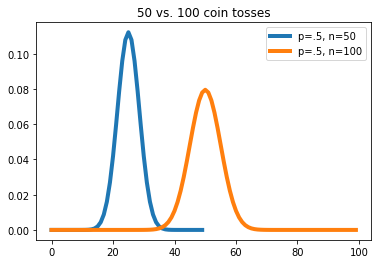

In [92]:
def binomial(n,m,p):
    comb = math.factorial(m) / (math.factorial(n) * math.factorial(m-n))
    prob = comb * p ** n * (1 - p) ** (m - n)
    return prob
p = 0.5                                 
for N in [50,100]:
    x = np.arange(N)                                      
    y = np.zeros(N) 
    for i in range(N):
        y[i]=binomial(i,N,p)                            
    plt.plot(x, y, lw=4, label='p=.5, n='+str(N)) 
    plt.legend()
    plt.title('50 vs. 100 coin tosses')

### 2.1.2 Bernoulli distribution

The bernoulli distribution is expressed as:

$$P(x=k)=\theta^k(1-\theta)^{1-k}$$


Bernoulli random variables with the same proability can be converted to the binomial distribution.

In [15]:
expr = θ**k*(1-θ)**(1-k)
expr

In [16]:
for i in [0,1]:
    print('K='+str(i)+': {}'.format(expr.subs({k:i})))

K=0: -θ + 1
K=1: θ


#### 2.1.2.1 Python example: Bernoulli distribution

- Flip coin three times: 

- What is the probability of the following $p(x_1=1,x_2=1,x_3=0)$?

In [17]:
expr.subs({k:1})*expr.subs({k:1})*expr.subs({k:0})

In [19]:
(expr.subs({k:1})*expr.subs({k:1})*expr.subs({k:0})).subs({θ:.5})

### 2.1.3 Poisson distribution

- Measures the count of the events that occur at a rate that is uniformly random in either time or space
- Events must be independent
- Continuous version of Bernoulli process
- In many real systems the probability of an event changes over time, but poisson can often be a reasonable approximation

The Poisson distribution is expressed as:

$$ P(Y|\lambda) = \frac{\lambda^y e^{-\lambda}}{y!}, k = 0,1,2, \dots $$

Summing all potential values of y:

$$\sum_y \frac{\lambda^y e^-\lambda}{y!}= e^{-\lambda} \Big[1+\lambda+\frac{\lambda^2}{2!}+\frac{\lambda^k}{k!}\Big]=e^{-\lambda}\times e^{\lambda}=1$$

$Var[y]=\lambda$

- The poisson is only appropriate when the mean and variance are similar
- If the variance is greater than the mean it might be better to use the negative binomial distribution

##### Circumstances when you can approximate binomial via poisson:

- x- Binomial(n,p)
    - $P(x=K)= \Big(\frac{n}{k}\Big)p^k(1-p)^{n-k}$

- The problem with binomial is that when we have large values of N relative to K, the term is difficult to calculate.
    - In this case we can use the poisson
        - If N is large
        - If P is small
        - X $\approx p_0(\lambda=N_p)$ 

##### Poisson example: events taking place uniformly over time:

- Births per hour on a given day in a given hospital
- Number of children born in the U.S. this year
- Customers arriving at a store
- Goals scored in a Hockey game

#### 2.1.3.1 Python example: Possion distribution
- Disease cases within a given town
Probability of 0 disease cases given the average is 5.

    - $P(y=0|\lambda=5)$
        - $\frac{5^0e^{-5}}{0!}=e^0=1$

In [39]:
#Python example
poisson = lambda lamb,y :lamb**y*np.exp(-lamb)/(math.factorial(y))
answer= round(poisson(5,0),5) 
print('Odds of getting 0 when mean is 5: {}'.format(answer))

Odds of getting 0 when mean is 5: 0.00674


#### 2.1.3.2 Python example: Possion distribution
- 100 students enter UMD library every hour.
- What is the probability that only 102 students enter this hour?


In [42]:
#Python example
poisson = lambda lamb,y :lamb**y*np.exp(-lamb)/(math.factorial(y))
answer= round(poisson(100,101),5)
print('Odds of getting 0 when mean is 5: {}'.format(answer))

Odds of getting 0 when mean is 5: 0.03947


#### 2.1.3.3 Python example: Visualize Poisson distribution


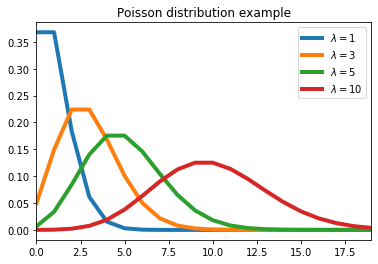

In [31]:
M = 20
x = np.arange(M)                                  
y = np.zeros(M) 
for lamb in [1,3,5,10]:
    for i in range(M):
        y[i]=poisson(lamb,i)
    plt.plot(x, y, lw=4, label=r'$\lambda=$'+str(lamb)) 

plt.legend()
plt.title('Poisson distribution example')
plt.margins(x=0)

### 2.1.4 Geometric distribution
- Distribution where the probabilities decrease exponentially

The geometeric distribution is expressed as:

$$P(n) = (1-p)^{n-1}p$$

$$\mu= \frac{1}{p}\\
\sigma = \sqrt{\frac{1-p}{p^2}}$$

### 2.1.5 Negative binomial distribution

A more general form of the geometric distribution.
- Instead of giving the first success in the nth trial, it gives the probability of an arbitrary kth success in the nth trial.

the negative binomial distribution is expressed as:

$$P(k|n) = {n-1 \choose k-1}p^k(1-p)^{n-k}$$


## 2.2 Continuous probability distributions
- 2.2.1 Normal
- 2.2.2 Exponential
- 2.2.3 Gamma
- 2.2.4 Beta
- 2.2.5 Pareto
- 2.2.6 Weibull

Other:
- Uniform distribution
- t-distribution
- Weibull Distribution
- Chi-square


### 2.2.1 Normal (Gaussian distribution)

PDF:
$$P(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp(-\frac{(x-\mu)^2}{2\sigma^2})$$

Expected value:
$$E[X|\mu, \sigma] = \mu$$

CDF:
$$CDF(x) = \frac{1}{2}\Big[1+erf(\frac{x-\mu}{\sigma\sqrt{2}})\Big]\\
 \\\text{Where erf(x)} = \frac{2}{\sqrt{\pi}\int^x_0e^{-t^2}}dt$$


#### 2.2.1.1 Python example: Gaussian PDF

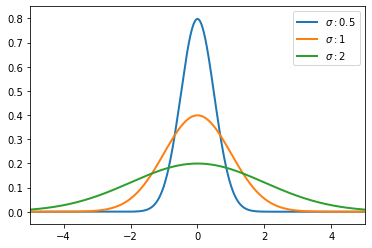

In [93]:
fig, ax = plt.subplots()
plt.xlim(-5, 5)
plt.ylim(-0.05,0.85)
x = np.arange(-5, 5, 0.01) 

def gauss(std, ave):
    left = 1/np.sqrt(2*np.pi*std**2)
    right = (np.exp(-(x-ave)**2/2/std**2))
    solu = left*right
    return solu

for std in [.5,1,2]:
    y = gauss(std,0)
    plt.plot(x, y, lw=2, label=r'$\sigma:$'+str(std)) 
    plt.legend()

#### 2.2.1.2 Python example: Gaussian CDF with integration in sympy

In [ ]:
x = var('x', real=True)
f = (1/sigma)*1

### 2.2.2 Exponential distribution
- Similar to a Poisson random variable but it can take non-integral values because it is continuous.

PDF:
$$f_X(x|\lambda) = \lambda e^{-\lambda x}, \\x \geq 0$$

CDF: 
$$1-e^{-\lambda x}$$

Expected value:
$$E[X | \lambda] = \frac{1}{\lambda}$$


#### 2.2.2.1 Python example: Exponential distribution

In [45]:
def expo(lamb, t):
    result = lamb*np.exp(-lamb*t)
    return result

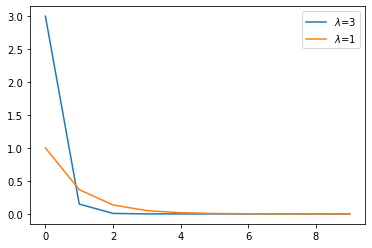

In [62]:
y1 = np.zeros(10)
y2 = np.zeros(10)
x = range(0,10)
for t in range(0,10):
    y1[t] = expo(3, t)
    y2[t] = expo(1,t)
plt.plot(x,y1, label=r'$\lambda$=3')
plt.plot(x,y2, label=r'$\lambda$=1')
plt.legend()
plt.show()

### 2.2.3 Gamma distribution

PDF:
$$f(x|\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha -1}e^{\beta x}}{\Gamma(\alpha)}$$


#### 2.2.3.1 Expected value of gamma proof:
$$E[y]=\int^{\infty}_{-\infty}\frac{\beta^\alpha}{\Gamma(\alpha)}y^{\alpha-1}e^{-\beta y} dy\\
=\frac{\beta^\alpha}{\Gamma(\alpha)}\int^{\infty}_{-\infty}y^{\alpha-1}e^{-\beta y}dy\\
=\frac{\beta^\alpha}{\beta^{\alpha+1}}\frac{\alpha!}{(\alpha-1!)}\\
=\frac{\alpha}{\beta}$$

#### 2.2.3.2 Python example: Gamma distribution

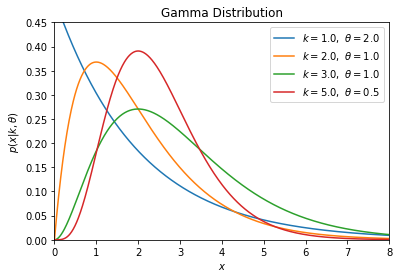

In [4]:
from scipy.stats import gamma
k_values = [1, 2, 3, 5]
theta_values = [2, 1, 1, 0.5]
x = np.linspace(1E-6, 10, 1000)
fig, ax = plt.subplots()

for k, t in zip(k_values, theta_values):
    dist = gamma(k, 0, t)
    plt.plot(x, dist.pdf(x),
             label=r'$k=%.1f,\ \theta=%.1f$' % (k, t))
plt.xlim(0, 8)
plt.ylim(0, 0.45)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k,\theta)$')
plt.title('Gamma Distribution')

plt.legend(loc=0)
plt.show()

### 2.2.4 Beta distribution
- An event with two outcomes with a domain between [0,1]
- The x-axis: possible probabilities for the events in question
- The y-axis is the probability that the possible probability is in fact the true probability
- The beta distribution is good for calculating the posterior disribution


PDF:

$$f(x|\alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)}$$




#### 2.2.4.1 Python example: Beta distribution

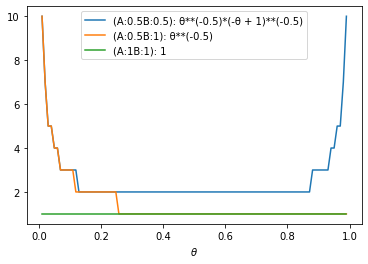

In [6]:
a,b,θ = var('a,b,θ', real=True)
a = [.5,.5,1]
b = [.5,1,1]
def beta(a, b):
    for i in list(zip(a,b)):
        expr = θ**(i[0]-1)*(1-θ)**(i[1]-1)
        #display(expr)
        length = 100
        x = np.linspace(.01,.99,length)
        y = np.zeros(len(np.linspace(.01,.99,length)))

        for idx,j in enumerate(np.linspace(.01,.99,length)):
            y[idx] = int(expr.subs({θ:j}))
        plt.plot(x,y, 
                 label='(A:'+str(i[0])+'B:'+str(i[1])+'): '+str(expr))
        plt.legend()
        plt.xlabel(r'$\theta$')
            # Unable to concatenate the individual arrays
            #print(x)
beta(a,b)

### 2.2.5 Pareto

CDF:

$$CDF(x)= 1-\Big(\frac{x}{x_m}\Big)^{-\alpha}$$



### 2.2.6 Weibull


CDF:

$$CDF(x)= 1-e^{-(x/\lambda)^k}$$

## 2.3 Compare PMF, PDF, CDF

### 2.3.1 Cumulative Distribution Function (CDF):
   - Cumulative probability a random variables takes the value of x
   - The complimentary distribution (CCDF) of a distribution is 1-CDF
   - Can take either discrete OR continuous

### 2.3.2 Python example: 

- Consider a survey about employment that contains the question "Are you employed?" 
- It is known that 65% of respondents will answer "yes." 
- Eight survey responses have been collected.

Reference: *Reference: Shanker, Tushar. Statistical simulation in python. Datacamp*

#### Probaility of three or less no answers? (CDF)

In [97]:
ss.binom.cdf(n=8, k=4, p=.65)

#### Probaility of five yes answers? (PMF)

In [95]:
ss.binom.pmf(n=8, k=5, p=.65)

#### Probaility of three or less no answers? (PDF)

In [99]:
ss.binom.sf(n=8, k=3, p=.65)

## 2.4 Expected values

Expected value of a random variable X:

$$E[X]=\mu$$

- The mean value
    - This changes with each distribution
- A summary of the random variable


### 2.4.1 Python example: Expected values

In [121]:
from scipy.stats import find_repeats
from scipy.stats import relfreq

trials, n, prob = [1000, 10,.5]
sample_of_two_coin_flips = ss.binom.rvs(n=n, p=prob, size=trials)
rel_freq = relfreq(sample_of_two_coin_flips, numbins=3).frequency
print("0-head probability: {}".format(rel_freq[0]))
print("1-head probability: {}".format(rel_freq[1]))
print("2-head probability: {}".format(rel_freq[2]))
expected = []
for idx, headnum in enumerate([0,1,2]):
    expected.append(rel_freq[headnum]*idx)
print('Expected value= 0*p0+1*p1+2*p2= {}'.format(sum(expected)))

0-head probability: 0.05
1-head probability: 0.786
2-head probability: 0.164
Expected value= 0*p0+1*p1+2*p2= 1.114


# 3. Statistics

## 3.1 Descriptive statistics

### 3.1.1 Sample mean: $$ \hat \mu = \frac{1}{n}\sum_i x_i $$


In [122]:
x = np.random.randint(20,size=10)
print(sum(x)/len(x))

11.0


### 3.1.2 Sample variance:

$$ \hat \sigma^2 = \frac{1}{n-1} \sum_i (x^{(i)} - \hat \mu)^2 $$


In [125]:
# Deviation function
x = np.random.randint(20,size=10)
def deviations(x):
    deviation = x-np.mean(x)
    return deviation

print('Deviations: {}'.format(deviations(x)))

def variance(x):
    var = sum(deviations(x)**2/len(x))
    return var
print('Variance is the sum of the deviances: {:.3f}'.format(variance(x)))

Deviations: [ 1.7 -5.3 -0.3 -9.3  4.7  0.7 -1.3  7.7 -7.3  8.7]
Variance is the sum of the deviances: 33.010


### 3.1.3 Sample standard deviation:

$$\hat{\sigma}=\sqrt{\frac{1}{N_1-1}\sum_{i=1}^{N_1} (X_{1i} -\bar{X}_1)^2}$$

In [126]:
def std(x):
    std = math.sqrt(variance(x))
    return std

std(x)

### 3.1.4 T-statistic:

$$t = \frac{r}{\sqrt{\frac{1-r^2}{n-2}}}$$

### 3.1.5 Covariance


$$ \hat \Sigma = \frac{1}{n-1} \sum_i (x^{(i)} - \hat \mu)(x^{(t)} - \hat \mu)^T $$


In [128]:
y = np.random.randint(20,size=10)
x = np.random.randint(20,size=10)

def covar(x,y):
    if len(x) != len(y):
        print("Cannot compute for arrays of different lengths")
    
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    sum = 0
    for i in range(0, len(x)):
        sum += ((x[i] - x_mean) * (y[i] - y_mean))
    return sum/(len(x)-1) #For sample covariance

print('Covariance: {:.3f}'.format(covar(x,y)))

Covariance: 9.644


### 3.1.6 Pearson correlation

$$ r = \frac{\sum^n_{i=1}(\frac{x_i - \bar x}{s_x})(\frac{y_i - \bar y}{s_y})}{n-1} $$

- $R^2$ is simply the square root of the above function.
- Thus if r = 0.9, $r^2$=.81





In [130]:
def pearson(x,y):
    
    cov = sum(deviations(x)*deviations(y))
    x_std = np.std(x)
    y_std = np.std(y)
    
    numerator = (cov/(x_std*y_std))
    result = numerator/len(x-1)
    pearson =result**2
    
    return pearson
print(f'Pearson: {round(pearson(x,y),4)}')

Pearson: 0.1723


### 3.1.7 Central moments

Expecation: 
- Value we expect to get if we repeat process and average 

#### Mean (1st central moment)
$$\mu= E[x-\bar x]$$

#### Variance (2nd central moment):
$$\mu_2= E[(x-\bar x)^2]$$

#### Skewness (3rd central moment):
$$\mu_3= E[(x-\bar x)^3]\\\
\text{Skewnewss} = \frac{\mu_3}{(\sigma^2)^{3/2}}$$

- Postive skew leans right

#### Kurtosis (4th central moment):
$$\mu_4= [(x-\bar x)^4]$$

- Divide by the variance squared subtracted by 3:

$$\text{Kurtosis}=\gamma = \frac{\mu_4}{\sigma_4}-3$$
$$\gamma>0 \ \ \text{Fatter tails than normal distribution}\\
\gamma<0 \ \ \text{Thinner tails than normal distribution}$$

In [138]:
sample = np.random.normal(loc=0, scale=3, size=100000)
def moments(sample):
    mean = np.mean(sample)
    print('Mean: {:.4f}'.format(mean))
    variance = sum((sample-mean)**2)/len(sample)
    print("Variance:{:.3f}".format(variance))
    std= math.sqrt(np.var(sample))
    print("Standard deviation:{:.3f}".format(std))
    skewness1 = sum((sample-mean)**3)/len(sample)
    skewness2 = skewness1/variance**(3/2)
    print("Skewness:{:.4f}".format(skewness2))
    kurtosis1 = sum((sample-mean)**4)/len(sample)
    kurtosis2 = (kurtosis1/variance**2)-3
    print("Kurtosis:{}".format(kurtosis2))
moments(sample)

Mean: -0.0155
Variance:8.989
Standard deviation:2.998
Skewness:0.0066
Kurtosis:-0.004630315163214327


## 3.2 Central limit theorem (CLT) and law of large numbers (LNN)

- LNN are the conditions in which the sample moments converge to the population moments as the sample size goes to $\infty$
- The CLT provides information about the rate at which the sample moments converge to population moments as the sample size goes to $\infty$

### 3.2.1 Independent, indentically distributed (iid)

- The condition in which data is independent from one another
- The outcome of one draw has no influence over the others

$$ P(X_1, \dots, X_n) = \prod_i P(X_i) $$

### 3.2.2 Law of Large Numbers (LLN)

Under iid conditions, as the sample size approaches infinity then sample and population mean converge:

$$ \lim_{n \to \infty} \frac{1}{n} \sum^n_{i=1} X_i = \mu $$


#### 3.2.2.1 Python example: LLN

- Each distribution converges to a mean after only 100 observations

*Reference: [quantecon](https://lectures.quantecon.org/py/lln_clt.html)*

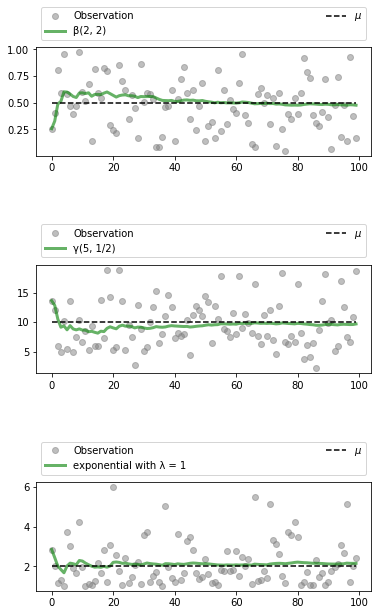

In [157]:
from scipy.stats import t, beta, lognorm, expon, gamma, uniform, cauchy
distributions = {
                 "β(2, 2)": beta(2, 2),
                 "γ(5, 1/2)": gamma(5, scale=2),
                 "exponential with λ = 1": expon(1)}
# Create a figure and some axes
num_plots = len(distributions)
fig, axes = plt.subplots(num_plots, 1, figsize=(6, 10))
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 2,'bbox_to_anchor': bbox,'loc': 3,'mode': 'expand'}
plt.subplots_adjust(hspace=1)
n=100
for ax in axes:
    name = np.random.choice(list(distributions.keys()))
    distribution = distributions.pop(name)
    data = distribution.rvs(n)
    sample_mean = np.empty(n)
    for i in range(n):
        sample_mean[i] = np.mean(data[:i+1])
    # Plot
    ax.plot(list(range(n)), data, 'o', color='grey', alpha=0.5, label='Observation')
    axlabel = name
    ax.plot(list(range(n)), sample_mean, 'g-', lw=3, alpha=0.6, label=axlabel)
    m = distribution.mean()
    ax.plot(list(range(n)), [m] * n, 'k--', lw=1.5, label='$\mu$')
    ax.legend(**legend_args)

plt.show()

#### 3.2.2.2 Python example: LLN not satisfied

If $E| X |< \infty$ then LLN is not satisfied and thus we do not observe a convergence toward a mean of 0

This can be illustrated by the Cauchy distribution which has fat tails.

The density function for Cauchy:

$$f(x) = \frac{1}{\pi (1 + x^2)} \qquad (x \in R)$$

*Reference: [quantecon](https://lectures.quantecon.org/py/lln_clt.html)*

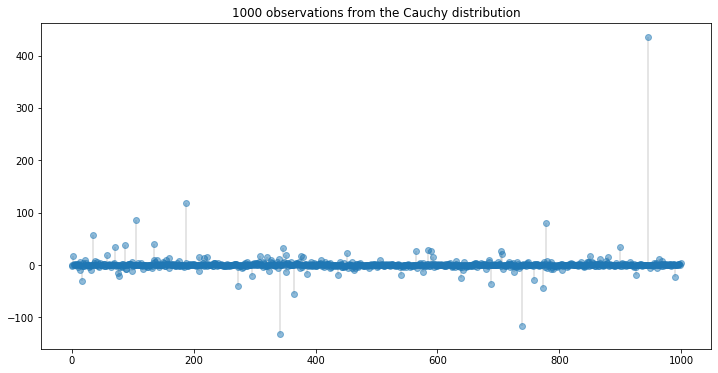

In [161]:
n = 1000
distribution = cauchy()

fig, ax = plt.subplots(figsize=(12, 6))
data = distribution.rvs(n)

ax.plot(list(range(n)), data, linestyle='', marker='o', alpha=0.5)
ax.vlines(list(range(n)), 0, data, lw=0.2)
ax.set_title(f"{n} observations from the Cauchy distribution")

plt.show()

### 3.2.3 Central Limit Theorem (CLT)

#### The essence of the CLT: addition under independence leads probability mass to pile up in the middle and thin out at the tails.

- The CLT provides information as to the rate at which sample moments converge to population moments
- If the CLT has a finite second moment, adding indepdendent copies of the data will lead to Gaussian curve

Weak law of large numbers:

$ \frac{1}{n} \sum^n_{i=1} X_i \rightarrow \mu $
Where, variance is $\frac{\sigma^2}{n}$

Random variable:

$Z_n = (\frac{1}{\sqrt{n}}\sum x_i)-\mu$ 

Variance is $\sigma^2$ because $\frac{1}{\sqrt{n}}$

The random variable $Z_n = \sqrt{n} (\frac{1}{n} \sum x_i- \mu)$ converges to the normal distribution $N(0,\sigma^2)$


### 3.2.3.1 Python example: (CLT)

- The binomial approximation of the normal distribution

*Reference: [quantecon](https://lectures.quantecon.org/py/lln_clt.html)*

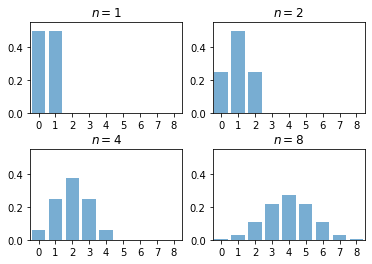

In [166]:
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(hspace=0.4)
axes = axes.flatten()
ns = [1, 2, 4, 8]
dom = list(range(9))

for ax, n in zip(axes, ns):
    b = ss.binom(n, 0.5)
    ax.bar(dom, b.pmf(dom), alpha=0.6, align='center')
    ax.set(xlim=(-0.5, 8.5), ylim=(0, 0.55),
           xticks=list(range(9)), yticks=(0, 0.2, 0.4),
           title=f'$n = {n}$')

plt.show()

# 4. Maximum Likelihood

## 4.1 Maximum Likelihood Estimation

### 4.1.1 Maximum Likelihood vs. Probability (The equivalence principle) 

$$P(X|\theta)=L(\theta|X)$$

##### Likelihood:
   - Varies $\theta$
   - X=constant
   
When we hold data constant and vary the parameter we don't have valid probability distribution. It is instead called a likelihood

#### 4.1.1.1 Example: Flipping a coin

Bernoulli
$Pr(x=k|\theta)=\theta^k(1-\theta)^{1-k}$

$x=1 \Rightarrow pr(x=1|\theta)=\theta=L(\theta|x=1)\\
x=0 \Rightarrow pr(x=0|\theta)=1-\theta=L(\theta|x=0)$

####  4.1.1.2 Python example: 

Why likelihood is not a probability distribution

$x= \begin{cases} 
0, tails \\
1, heads\end{cases}$

$Pr(x=1)=\theta\\
Pr(x=0|\theta)=1-\theta\\
Pr(x=k|\theta)=\theta^k(1-\theta)^{1-k}$

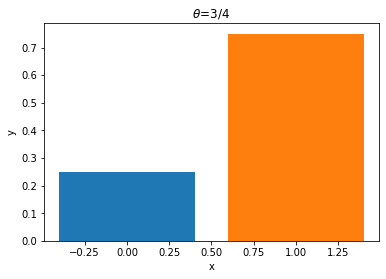

In [171]:
def ber(t,k):
    res = t**k*(1-t)**(1-k)
    return res
for i in [0,1]:
    result= ber(.75,i)
    plt.bar(i, result)
    plt.title(r'$\theta$=3/4')
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.ylim([0,.75])

## 4.2 Likelihood ratio

Python examples:
- 2.3.1 Binomial function
- 2.3.2 Likelihood ratio function
- 2.3.3 Graphing MLE estimation and Likelihood ratio function

### 4.2.1 Binomial function

In [5]:
def binom(n,x,p):
    fact = (math.factorial(n))/(math.factorial(x)*math.factorial((n-x)))
    non_fact = p**(x)*(1-p)**(n-x)
    result = fact*non_fact
    return result
print("Likelihood ratio: {:.3f}".format(binom(10, 6, .5)/binom(10, 6, .75)))
print('The data is {:.1f} times as probable under a fair coin hypothesis than under the trick coin hypothesis'.format(binom(10, 6, .5)/binom(10, 6, .75)))

Likelihood ratio: 1.405
The data is 1.4 times as probable under a fair coin hypothesis than under the trick coin hypothesis


### 4.2.2 Likelihood ratio function

In [181]:
def likelihood_ratio(h,n,p1,p2):
    l1 = binom(n,h,p1)/binom(n,h,(h/n))
    l2 = binom(n,h,p2)/binom(n,h,(h/n))
    ratio = binom(n,h,p1)/binom(n,h,p2)
    return ratio

print(likelihood_ratio(6,10,.5,.75))

1.4046639231824416


### 4.2.3 Graphing MLE estimation and Likelihood ratio function for MLE and other random point

In [174]:
def graph_MLE(n,x, p1, p2):
    length = np.linspace(0,1,101)
    y_g = np.zeros(len(length))
    for idx,i in enumerate(length):
        y_g[idx] = binom(n,x,i)/(binom(n,x,(x/n)))
    x_g = np.linspace(0,1,len(length))
    plt.plot(x_g,y_g)
    trials, heads, prob = [n, x, p1]
    y1 = binom(trials, heads, prob)/ binom(trials, heads, (heads/trials))
    x1 = p1
    plt.plot(x1, y1, marker='o', color='r', label='p={}'.format(p1))
    trials, heads, prob = [n, x, p2]
    y2 = binom(trials, heads, prob)/ binom(trials, heads, (heads/trials))
    x2 = p2
    plt.plot(x2, y2, marker='o', color='g', label='p={}'.format(p2))
    plt.title('MLE estimation for getting {} heads in {} tosses'.format(x,n))
    plt.axvline(x=.6,ymax=.95, color='orange', label='Hypothesis best supported by the data')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=3, fancybox=True, shadow=True)
    plt.arrow(x1,y1,(x2-x1),0, color='pink')
    plt.arrow(x2,y1,0,(y2-y1), color='pink')
    plt.text(.8,.7,'L_Ratio:{:.3f}'.format(likelihood_ratio(x,n,p1,p2)), color='pink')
    plt.show()

Compare each of our hypotheses against the best supported hypothesis. 

We compute the likelihood ratios: 
1. L(.6)/L(.5) ≈ 7.5 
2. L(.6)/L(.75) ≈ 224.

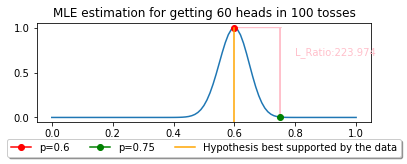

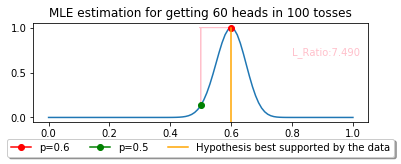

In [186]:
plt.subplot(2,1,1)
graph_MLE(100,60, .6,.75)
plt.subplot(2,1,2)
graph_MLE(100,60, .6,.5)

## 4.3 Likelihood function


$\theta$ is a parameter of unknown value

- Let $x_1,\cdots x_n$ random sample from the PMF/PDF: $f(x|\theta)$
    - Assume x's are iid
    
##### Likelihood function:

$$L(\theta|x_1\cdots x_n)\\
= \text{Joint PMF of of our random sample}\\
=F(x_1|\theta)\cdots f(x_n|\theta)\\
=\prod f(x_i|\theta)$$

#### $\color{red}{\text{The maximumum likelihood estimator (MLE) is the value of} \ \ \theta \ \  \text{that maximizes} \ L(\theta|x_1 \cdots x_n)}$

### 4.3.1 Binomial MLE

#### Binomial Likelihood function:
$f(p|x)=\Big(\frac{n}{x}\Big)p^x(1-p)^{n-k}\\
= log L(p|x)=log\Big(\frac{n}{k}\Big)+x log(p)+(n-x)log(1-p)\\
=log\prime= \frac{x}{p}+\frac{n-x}{1-p}(-1)\\
\text{Set equal to 0 and solve for P}\\
=\frac{x}{p}=\frac{n-x}{1-p}\\
=\hat{p}=\frac{x}{n}$

#### Example: Binomial MLE
- 6 free throws
- 5 are successful
- X=# of successes
    - x=5, n=6
- Assume $x\sim Binomial(n,p)$
- So the PMF is: $f(x|p)=\Big(\frac{n}{x}\Big)p^x(1-\theta)^{n-k}$
$$\hat{p}=5/6$$

Product of the PMFS:
$$L(P|x_1, \cdots, x_6)=\prod^{6}_{i=1}f(x_i|p)\\
=\prod^{6}_{i=1}p^{xi}(1-p)^{1-x_i}\\
=p^{\sum^6 x_i}(1-p)^{\sum^6 1-x_i}\\
=Log(P|x)=(\sum^6 x_i)log(p)+\sum^6(1-x_i)log(1-p)\\
L\prime(P|x)=\frac{\sum x_i}{p}-\frac{\sum(1-x_1)}{1-p}\\
\text{Set equal to 0 and solve for P}\\
\Rightarrow\frac{\sum x_i}{p}=\frac{\sum(1-x_i)}{1-p}\\
= (1-p)\sum x_i = p\sum (1-x_i)\\
\sum x_i-p\sum x_i = p[\sum^6-\sum^6 x_i]\\
\Rightarrow \sum x_i =\frac{6}{p}\\
\Rightarrow \hat{p}=\frac{\sum x_i}{6}
$$


### 4.3.2 Poisson MLE

#### PDF:
$$PDF=f(x_i|\lambda) =\frac{e^{-\lambda}\lambda^{xi}}{x_i!}$$

#### Example: Poisson MLE

$x_i$ = # of textbooks

Random sample of 50 students asking them how many textbook students purchase

$\sum^{50}_{i=1} x_i=150$

$x_i\sim Poisson(\lambda)$


#### Likelihood function:
$$L(\lambda|x_1,\cdots, x_{50}) = \prod^{50}_{i=1}f(x_i|\lambda)\\
=\prod^{50}_{i=1}\frac{e^{-\lambda}\lambda^{xi}}{xi!}\\
log(\lambda|x_1,\cdots, x_{50}) = \sum^{50}log\Big[\frac{e^{-\lambda}\lambda^{xi}}{xi!} \Big]\\
=\sum^{50}[-\lambda+xi \ \ log\lambda-log(xi!)]\\
\text{Since we can drop out the constants}\\
Log(\lambda|x_1,\cdots, x_{50})\propto\sum^{50}[-\lambda+x_i log \lambda]\\
=-50\lambda+\sum x_i log \lambda\\
=\text{Take derivative w.r.t lambda}\\
Log(\lambda|x_1,\cdots, x_{50})\prime= -50 +\frac{\sum^{50}}{\lambda}\\
\text{Set to zero}
\Rightarrow 50=\frac{\sum x_i}{\lambda}\\
\Rightarrow \hat{\lambda}=\frac{\sum x_i}{50}=\frac{150}{50}=3$$

### 4.3.3 Uniform MLE

PDF:
$f(x_i|\theta) = \frac{1}{\theta}$

### 4.3.4 Normal MLE

-The PDF equation quantifies how likely it is our chosen values will appear in a distribution with certain parameters.


#### 4.3.4.1 Python example: Normal MLE


- We sample the number 3
    - What is the probability it comes from a distribution of μ = 3 and σ = 1?
    
*Reference: Knudson, Christina. [Maximum Likelihood Estimation](https://www.youtube.com/playlist?list=PLdxWrq0zBgPXWD7_sc7uf8BdirORFRA2-)*


In [188]:
ss.norm.pdf(3,3,1)

#### 4.3.4.2 Python example: Normal MLE
- What is the probability of drawing a 2 and a 6 consecutively from a distribution of $\mu=4, \sigma=1$

In [191]:
ss.norm.pdf(2, 4, 1)*ss.norm.pdf(6, 4, 1)

## 4.4 Calculating the Log-likelihood

- Comparing the data to the distribution

### 4.4.1 Python example: Log-likelihood

Calculate log likelihood of sample of 13 numbers in the variable x.

x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]


In [29]:
x = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]

def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=3):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(ss.norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(ss.norm.pdf(i, mu_2, sd_2))
    
    print(r"The Log-Likelihood x for mu = %d and sd = %d: %.4f" % (mu_1, sd_1, ll_1))
    print(r"The Log-Likelihood x for mu = %d and sd = %d: %.4f" % (mu_2, sd_2, ll_2))
compare_data_to_dist(x)

The Log-Likelihood x for mu = 5 and sd = 3: -33.9679
The Log-Likelihood x for mu = 7 and sd = 3: -33.3013


## 4.5 Numerical optimization

$$ \ell(\theta)= Log f_{Y_T,Y_{t-1}\cdots, Y_1}(y_T,y_{T-1}, \cdots,y_1; \theta)\tag{5.7.1}$$

- Given the observed data, the foormulas given could be used to cacluclate the value of $\ell(\theta)$
- We can guess value of $\theta$ to see what the result of $\ell(\theta)$ will be
- Using a series of guesses for $\theta$ compare the outputs $\ell(\theta)$ and try to infer the max value of $\hat{\theta}$
    - This is described as numerical maximization
    
### 4.5.1 Grid search

- The simplest approach to numerical maximazation is known as the grid search method

##### 4.5.1.1 Python example: Grid search
- Suppose we have an AR(1) process
    - Mean 0: c=0
    - Unit variance: $\sigma^2=1$
    - The only unknown parameter is the autoregressive coefficient $\phi$

$$\ell(\theta)= -\frac{T}{2}log(2\pi)+\frac{1}{2}log(1-\phi^2)-\frac{1}{2}(1-\phi^2)y_1^2-\frac{1}{2}\sum^{T}_{t=2}(y_t-\phi y_{t-1})^2 \tag{5.7.2}$$

Suppose the sample consists of the following T=5 observations:
$$y_1 = .8 \ y_2 = .2 \ y_3 = -1.2 \ y_4 = -.4 \ y_5 = 0$$


*Reference: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896) *Princeton University. (1994)**

Max theta when L(Theta)=0: -5.895


[]

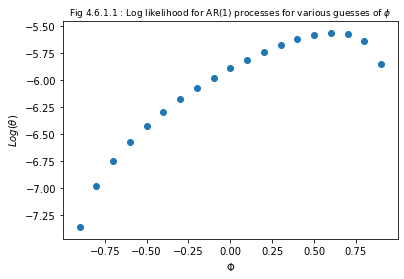

In [28]:
obs = [0.8, 0.2, -1.2, -0.4, 0]
def grid_search(T, phi, obs):
    one = -(T/2)*np.log(2*np.pi)
    two = (1/2)*np.log(1-phi**2)
    three = -1/2*(1-phi**2)*obs[0]**2 #obs[0]=y_1
    y = np.zeros(4)
    for i in range(0,4):
        y[i]= obs[i+1]-(phi*obs[i])
    four = -(1/2*(sum(y)**2))
    #End fourth
    
    combine = one+two+three+four
    return combine

print('Max theta when L(Theta)=0: {:.3f}'.format(grid_search(5, 0, obs)))
y = np.zeros(len(np.linspace(-.9,.9,19)))
x = np.linspace(-.9,.9,19)
for idx, i in enumerate(np.linspace(-.9,.9,19)):
    y[idx]= grid_search(5,i, obs)
plt.scatter(x,y)
plt.title('Fig 4.6.1.1 : Log likelihood for AR(1) processes for various guesses of $\phi$', size=9)
plt.xlabel('$\Phi$')
plt.ylabel(r'$Log(\theta)$')
plt.show()

- Fig 4.5.2.1 has a unique maximum


- In order to find the exact maximum we have to focus on a more granular subregion in the parameter space to come abritrarily close to the value of $\phi$ that maximizes $\ell(\theta)$


- But even focusing on a subregion, we do not find an exact MLE $\hat\theta$ but instead approximates it within a desired accuracy
    - This is the case with any numerical maximization algo
    
- Thus to use these algos we must set a `convergence criterion`


- For AR(1) the log-likelihood function is unimodal
    - In other words there is a unique $\theta$ at $\frac{\partial\ell(\theta)}{\partial\theta}=0$

### 4.5.2 Steepest ascent

- Grid search is appropriate when there is a single unknown parameter to estimmate
- But it becomes difficult when $\theta$ becomes large

- An alternate method to maximize a continuously differentiable function of a large number of parameters is known as steepest ascent


- Suppose:
    - We have an initial parameter vector $\theta^{(0)}$ 
    - We want to come up with a better estimate $\theta^{(1)}$
    - But we are constrained to choose $\theta^{(1)}$ so that the squared sitance between $\theta^{(0)}$ and $\theta^{(1)}$ is some fixed number K:
        - $(\theta^{(1)}-\theta^{(0)})\prime(\theta^{(1)}-\theta^{(0)})$

Thus we the optimal value of $\theta^{(1)}$ would be the solution to a constrained maximization problem with the lagrangean form:

$$J(\theta^{(1)}) =log(\theta^{(1)})+\lambda[k-(\theta^{(1)}-\theta^{(0)})\prime(\theta^{(1)}-\theta^{(0)})] \tag{5.7.3}$$

Differentiating 5.7.3 w.r.t $\theta^{(1)}$ and setting result equal to zero:

$$\frac{\partial log(\theta)}{\partial\theta}\Bigr\rvert_{\theta=\theta^{(1)}}- (2\lambda)(\theta^{1}-\theta^{(0)})=0\tag{5.7.4}$$

The gradiant vector of the log likelihood function:
- If there are a elements in $\theta$ then $g(\theta)$ is an (ax1) vector whose ith element represents the derivative of the log likelihood w.r.t the ith element of $\theta$

$$g(\theta)\equiv \frac{\partial log(\theta)}{\partial\theta}$$

We can write 5.7.4 as:

$$\theta^{(1)}-\theta^{(0)}= (1/2\lambda)*g(\theta^{(1)})\tag{5.7.5}$$

- Expression 5.7.5 asserts that if we are allowed to change $\theta$ by only a fixed amount, the biggest increase in the log likelihood function will be achieved if the change in theta is chosen to be constant $1/(2/\lambda)$ times the gradiant vector.
- The gradiant vector $g(\theta^{(0)})$ gives the direction in which the log likelihood function increases most steeply from $\theta^{(0)}$


- Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896) *Princeton University. (1994)*

#### 4.5.2.1 Python Example: Steepest ascent

In [31]:
from sympy import symbols, diff, solve, var, Derivative, Transpose
from sympy import init_printing
from sympy.tensor.array import derive_by_array
from IPython.display import display
θ1, θ2 = var('θ1 θ2', real=True)

ll = -1.5*θ1**2-2*θ2**2
ll

In [33]:
Derivative(ll, θ1).doit()

In [34]:
Derivative(ll, θ2).doit()

In [37]:
print('Gradient:')
grad = derive_by_array(ll, (θ1, θ2))
grad

Gradient:


[-3.0⋅θ1  -4⋅θ2]

Hessian:


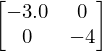

In [38]:
print('Hessian:')
derive_by_array(derive_by_array(ll, (θ1, θ2)), (θ1, θ2))

Suppose we guess $\theta^{(0)}=(-1,1)\prime$


In [40]:
grad.subs({θ1:-1,θ2:1})

The gradient vector evaluated at $\theta^{(0)} is$:

$$g(\theta^{(0)})=\begin{bmatrix}3\\-4 \end{bmatrix}$$

So the optimal step $(\theta^{(1)}-\theta^{(0)})$ should be proportional to (3,-4): for example with k=1 we would choose:

$$ (\theta_1^{(1)}-\theta_0^{(0)})=3/5\\
(\theta_2^{(1)}-\theta_2^{(0)})=-4/5$$

- So our guesses would be $\theta_1^{(1)}=-.4 \theta_2^{(1)}=.2$
- To increase the likelihood by the greatest amount we want to increase $theta_1$ and decrease $theta_2$ relative to their values at the initial guess $\theta^{(0)}$

Returning to the black box perspective we can aribitrarily guess the value of $\theta$ and then calculate the gradient vector at $\theta^{(0)}$:

$g(\theta^{(0)})= \frac{\partial log(\theta)}{\partial\theta}\Bigr\rvert_{\theta=\theta^{(0)}}\tag{5.7.8}$

5.7.5 suggests that we should tinker with the value of $\theta$ in the direction of the gradient:

$$(\theta^{(1)}-\theta^{(0)})=s*g(\theta^{(0)})$$

- We can then plug in different values of S: [1/16,1/8,1/4] choosing new estimates of $\theta^(1)$
- This is continued iteratively:

$$\theta^{(m+1)}\theta^{(m)}+s*g(\theta^{(m)})$$

This process continues until some convergence criterion is satisfied.

 ### 4.5.3 Newton-Rapson
 
- The drawback of the steepest-ascent method is that it requires a large numer of iterations to close in on a local max.
- An alternative method is the Newton-Raphson
    - It often covernges more quickly IF:
        1. Second derivatives of the log likelihood function $\ell(\theta)$ exist
        2. The function $\ell(\theta)$ is concave, meaning that the -1 times the matrix of the second derivatives is everywhere positive definite


$\underset{ax1}{g(\theta^{(0)})}= \frac{\partial log(\theta)}{\partial\theta}\Bigr\rvert_{\theta=\theta^{(0)}}$

And $H(\theta^{0})$ denotes the -1 times the matrix of second derivatives

$\underset{axa}{H(\theta^{0})}= \frac{\partial^2 log(\theta)}{\partial\theta\partial\theta\prime}\Bigr\rvert_{\theta=\theta^{(0)}} $


Consider approximating $log(\theta)$ with a second order taylor series around $\theta^{(0)}$

$log(\theta)\cong log(\theta^{(0)})+g(\theta^{0})\prime(\theta-\theta^{(0)})- 1/2(\theta-\theta^{(0)})\prime H(\theta^{(0)})(\theta-\theta^{(0)})\tag{5.7.10}$
 
 Setting the derivative of 5.7.10 w.r.t $\theta$ equal to zero:
 
 $g(\theta^{0})-H(\theta^{(0)})(\theta-\theta^{(0)})\tag{5.7.11}$

Expression 5.7.11 suggests that an improved estimate of $\theta$ would satisfy:

 $(\theta^{1}-\theta^{0})=H(\theta^{(0)})^{-1}g(\theta^{(0)})\tag{5.7.12}$


- You can calculate the derivative of the log likelihood at the initial guess $g(\theta^{(0)})$ either analytically as in 5.7.7 or numerically 5.7.9

- If the log likelihood function happens to be a perfect quadratic function then 5.7.10 holds excactly then 5.7.12 will generate the exact MLE in a single step
- If the quadratic approximation is reasonably good, Newton_rhapson should converge to the local maximum more quickly than the steepest-ascent. 
    - If the likelihood function is not concave this is not the case
    - Steepest ascent is slower to converge but more robust
    

*Reference: Hamilton, J. D. [Time series analysis.](https://www.amazon.com/Time-Analysis-James-Douglas-Hamilton/dp/0691042896) *Princeton University. (1994)**

 #### 4.5.3.1 Example: Newton-Rapson
 
 Newton Raphson equation:
 
 $$x_{n+1}=x_n-\frac{f(x_n)}{f\prime(x_N)}$$
 
##### Problem:
- Given $x^3+2x-2=0$ has a root between 0 and 1, find the root using the Newton-Rhapson method

In [43]:
from scipy import misc
def newtonrhap(f, x, tolerance=0.0001):
    while True:
        x1 = x - f(x) / misc.derivative(f, x) 
        t = abs(x1 - x)
        if t < tolerance:
            break
        print(x)
        x = x1
    return x
def f(x):
    return x**3+(2*x)-2

x = 1
x0 = newtonrhap(f, x)

print('x: ', x)
print('x0: ', x0)
print("f(x0) = ", x**3+(2*x)-2)

1
0.8333333333333334
0.785063752276867
0.7739310916241456
0.7715497296713583
0.7710493991999068
x:  1
x0:  0.7709446841632347
f(x0) =  1


# 5. Baye's theorem

## 5.1 introduction
Probability of a conjuction:
$$P(A \ \text{and} \ B) = p(A)p(B|A)$$

A and B are intererchangable:
$$P(B \ \text{and} \ A) = p(B)p(A|B)$$

Combining the two:
$$P(B)P(A|B)=P(A)p(B|A)$$

Divide by p(B) for `Bayes theorem:`
$$P(A|B)= \frac{P(A)p(B|A)}{p(B)}$$


##### Another way to view Bayes is:
$$P(H|E) = P(\text{Hypothesis}) \cdot \frac{P(\text{Evidence}|\text{Hypothesis})}{\text{Evidence}} $$

- Probability of H after you have seen E is the product of P(H)
    - This is the probability of H before you saw the evidence, and the ratio of P(E|H),
    - The probability of seeing the evidence assuming that H is true and P(E), 
    - The probability of seeing the evidence under any circumstances (H true or not).


- `Posterior:` P(H|E)
- `Likelihood:` P(E|H)
- `Normalizing constant:` P(E)


### 5.1.1 Example: Baye's theorem


### The Cookie problem:

- Bowl 1: 30 vanilla, 10 chocolate
- Bowl 2: 20 vanilla, 20 chocolate

**Suppose we randomly draw a vanilla cookie. What is the probability it came from bowl 1?**

- This answer would be straightforward IF the question was P(Vanilla|Bowl 1).
   - 3/4 because 30/40 cookies are vanilla in bowl one
   
Instead the answer can be found using Bayes

$$P(\text{Bowl 1}|\text{Vanilla})= \frac{p(B_1)p(V|B_1)}{p(V)}\\
= \frac{1/2\cdot3/4}{5/8}\\
=.6$$

### Python Example: Simulating a bayesian problem

- 9 urns contain 2 white, 2 black: Let's call these "Uniform urns"
- 1 urn contains 5 white, 1 black: Let's call these "Black sheep urn"
- A white ball is drawn

Question: What is the probability that the ball is from the "Black sheep urn"?




Analytical prob: 0.15625


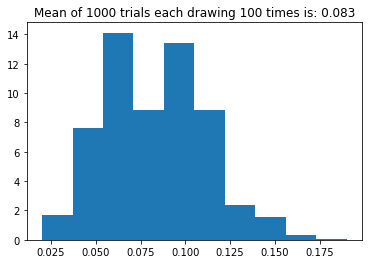

In [651]:
#Create 9 "uniform urns"
uniform_urns= {}
for i in range(1,10):
    contents = ['w']*2 + ['b']*2
    uniform_urns[str('urn_%s' % i)] = contents
#Create "black sheep urn"
blacksheep = ['w']*5+['b']*1
print('Analytical prob: {}'.format(5/32))
sims1, sims2 = [1000,100]
sims_result = []
for _ in range(sims1):
    success = 0
    for _ in range(sims2):
        urns = list(uniform_urns.keys())
        urns.append('black')
        choose_urn = np.random.choice(urns)
        #print(choose_urn)
        if choose_urn== 'black':
            choose_blacksheep = np.random.choice(blacksheep)
            #print(choose_blacksheep)
            if choose_blacksheep =='w':
                success+=1
    sims_result.append(success/sims2)
plt.hist(sims_result,density=True)
plt.title('Mean of {} trials each drawing {} times is: {:.3f}'.format(sims1,sims2, np.mean(sims_mean)))
plt.show()

## 5.2 Diachronic interpretation

Bayes allows the analyst to update the probability of a hypothesis (H) in light of new data (D).

This diachronic interpretaiton can be expressed:

$$P(H|D) = \frac{p(H)p(D|H)}{p(D)}$$

- In the case of 5.1.1 the problem specified that we choose a bowl at random with equal probability.
- However, we can also compute priors based on non-random background information


### 5.2.1 Example: Diachronic interpretation

- We have two bags of M&Ms, one from 1994 and one from 1996.
- Suppose we draw 1 yellow and 1 green from each seperate bag without knowing which they came from.
- #### What is the probability that that the yellow came from the 1994 bag?

Two bags:
- 1994 bag: Brown: .3, Yellow: .2, Red: .2, Green: .1, Orange: .1, Tan: .1

- 1995 bag: Blue: .24, Brown: .3, Yellow: .14, Red: .13, Green: .16, Orange: .14, Tan: .1

The answer can be displayed in the chart 5.2.1


#### Chart: 5.2.1
Via ["Think Bayes: Bayesian Statistics in Python", Allen B. Downey](https://www.amazon.com/Think-Bayes-Bayesian-Statistics-Python-ebook-dp-B00F5BS96Q/dp/B00F5BS96Q/ref=mt_kindle?_encoding=UTF8&me=&qid=)


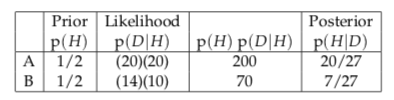



The second column has the likelihoods.
- IF A is true: 
     - yellow came from 1994 bag with .2 probability
     - green came from 1996 bag with .2 probability
- IF B is true:
     - yellow came from 1996 bag with .14 probability
     - green came from 1994 bag with .1 probability
        
        
- The third column is just the product of the previous two. The sum of this column, 270, is the normalizing constant. 


- The last column is posteriors, where we divide the third column by the normalizing constant

#### Thus our final answer is that there is a 20/27 chance our yellow was drawn from 1994 and green was drawn from 1996


*Reference: Material thus far in chapter 5: Downey, Allen B. ["Think Bayes: Bayesian Statistics in Python."](https://www.amazon.com/Think-Bayes-Bayesian-Statistics-Python-ebook-dp-B00F5BS96Q/dp/B00F5BS96Q/ref=mt_kindle?_encoding=UTF8&me=&qid=) *Green Tea Press*

### 5.2.2 Example: Bayes box-denominator


We have a bag with two balls:
- We draw 2 red balls with replacement
- What is the number of red balls in the bag?

Putting the problem in Bayes formula:
$Pr(R|2 red)=\frac{Pr(Red)\times Pr(2 red|R)}{Pr(2 red)} $

|   R | Pr(R) | Pr(2red $\lvert$ R)| Pr(R)$\times$Pr(2red $\lvert$ R)| Pr(r$\lvert$2red)|
| --- |:-----:| ---|  ---| --:|
|0    | 1/3   | 0 |  0| 0/(5/12)|
|1    | 1/3   | 1/2$\times$ 1/2  |  1/12| (1/12)/(5/12)=1/5|
|2    | 1/3   |  1|  4/12| (4/12)/(5/12)=4/5|
|Total   | 1 | 5/4|  Pr(2red)=5/12| 1|

Interpretting the 2nd column Pr(2red $\lvert$ R):

- If there are 0 red balls the chance of drawing red is of course zero
- If there is 1 red ball the chance of drawing the first red ball, then drawing the replaced red ball.
- If there are 2 red balls in the bag then of course we will draw 2

- The likelihood of the Pr(2red $\lvert$ R) column is 5/4, thus it is not a valid probability distribution

Changing our prior we can update the Bayes box to attain our posterior estimates seen in our last column : Pr(r$\lvert$2red)

|   R | Pr(R) | Pr(2red $\lvert$ R)| Pr(R)$\times$Pr(2red $\lvert$ R)| Pr(r$\lvert$2red)|
| --- |:-----:| ---|  ---| --:|
|0    | 1/4   | 0 |  0| 0|
|1    | 1/4   | 1/4 |1/16|1/9|
|2    | 1/2   |  1|  8/16| 8/9|
|Total   | 1 | 5/4| 9/16| 1|


*Reference: Lambert, Ben. [A Student's Guide to Bayesian Statistics](https://www.youtube.com/playlist?list=PLwJRxp3blEvZ8AKMXOy0fc0cqT61GsKCG)*


### 5.2.3 Explaining intuition behind Bayesian influence

$$P(\theta|x)=\frac{P(x|\theta)\times P(\theta)}{P(x)}$$
- Bayesian rule denominator term does not contain data depedendece
- So the shape of the posterior is determined by the likelihood of Bayes rule

$$\propto P(X|\theta)\times P(\theta)$$

- The posterier is a weighted average of the likelihood and the prior
- In general the "posterior peak" is somewhere between the MLE and the peak of the prior
- As data(x) $\uparrow \Rightarrow P(x|\theta)\downarrow$

## 5.3 Priors

- `Informative prior:` Choses the prior that best represents background information about the problem
    - E.g.: The triangle prior

- `Uninformative prior:` Choses the prior to let the data speak for itself



### 5.3.1 Example: Priors

- A train company displays numbers on the side of trains $(\text{In order}: 1\cdots N)$. 
- You notice that the one you are traveling on is train number 60.

#### Estimate how many trains the company operates.

Applying Bayesian reasoning we can look at the problem in two steps:

1. What did we know about the number of trains before we saw the number 60
    - This is the prior!
2. For any given value of N (train #) what is the likelihood of seeing the data, such as the train with the number 60 we saw.
    - This is the likelihood!
    
We can start by considering N to be any value 1 to 1000.


*Reference: Downey, Allen B. ["Think Bayes: Bayesian Statistics in Python."](https://www.amazon.com/Think-Bayes-Bayesian-Statistics-Python-ebook-dp-B00F5BS96Q/dp/B00F5BS96Q/ref=mt_kindle?_encoding=UTF8&me=&qid=) *Green Tea Press*

### 5.3.2 Improper prior $\Rightarrow$ Improper posterior

Coin toss example:

$x= \begin{cases} 
0, tails \\
1, heads\end{cases}$

$Pr(x=k|\theta)=\theta^k(1-\theta)^{1-k}\eta(1-\theta)$


#### We use Haldane's prior:

$P(\theta)=\frac{1}{\theta(1-\theta)}; 0\leq\theta\leq1$


Integrate:
$\int\frac{1}{\theta(1-\theta)}d\theta=\int\frac{1}{\theta}\times\frac{1}{1-\theta}d\theta>\int\frac{1}{\theta}=[log\theta]^1_0=log1-log0=\infty$

- Below we demonstrate that $P(\theta)=\frac{1}{\theta(1-\theta)}$ is not a valid probability distribution.
- But the posterior that follows from using the prior is a valid probability distribution

Bayes rule:
$P(\theta|x=k)=\frac{Pr(x=k|\theta)\times P(\theta)}{\int Pr(xf=k|\theta)\times P(\theta)d\theta}$

**But we can ignore the denominator because it does not affect the result we obtain.** Thus Bayes rule can be re-written:

$\propto \theta^k(1-\theta)^{1-k}\times \theta^{-1}\\
=\theta^{k-1}(1-\theta)^-k=\text{Functional form of posterior estimation}$

If we flip our coin and we get tails: x=0 then our posterior estimation:

$$\theta^{-1}\\
\int Pr(\theta|x=0)d\theta=\int \theta^{-1}=[log\theta]^1_0=\infty$$

*Reference: Lambert, Ben. [A Student's Guide to Bayesian Statistics](https://www.youtube.com/playlist?list=PLwJRxp3blEvZ8AKMXOy0fc0cqT61GsKCG)*


#### 5.3.2.1 Python Example: Haldane's prior

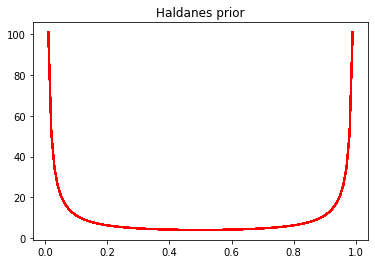

In [3]:
def haldane(theta):
    result = (1)/(theta*(1-theta)) 
    return result

x= np.linspace(.01,.99, 100)
for i in x:
    y = haldane(x)
    plt.plot(x,y, color='red')
    plt.title('Haldanes prior')

## 5.4 Conjugate prior

$$P(\theta|Data, Model)=\frac{P(Data|\theta, Model)\times P(\theta|Model)}{P(Data|M)}$$

- If we assume likelihood function: $P(Data|\theta, Model)\sim$ Normal
    - We can choose prior to be normal $P(\theta|Model)\sim$
    - Then the posterior $P(\theta|Data, Model)$ will also be normal
    - We can also choose our prior to be gamma distribution, which is often used.
    
    
Sometimes our normality assumption is not realistic. But the benefits of a prior such as gamma are:
   - We need less calculation
   - The distribution generates a posterior exactly

## 5.5 Posterior predictive check (PPC)

#### PPCs are a way to check the fit of our model to data

$$P(\tilde{x}|x)\approx \theta_i\sim P(\theta|x)+\tilde{x} \sim P(\tilde{x}|\theta_i)$$

- Iterative process to represent posterior predictive distribution.
    - Each steps represents two sources of uncertainty
        - Parameter: $\theta_i\sim P(\theta|x)$
        - Data generating process: $\tilde{x} \sim P(\tilde{x}|\theta_i)$
- If model does not fit we need to change the model

#### Example: $x_i$= The number of cars using a parking lot

$x_i \sim poisson(\lambda)\\
\lambda \sim gamma(\text{unknown})\\
\lambda (x \sim gamma) \Rightarrow \text{Posterior}$

To generate posterior:

$\text{Sample}\lambda_i \text{from posterior}\\
\text{Sample} \ x_i \sim Poisson(\lambda_i)$

- We then compare the max value of simulated data with real.
- This allows us to calculate Bayesian Probability
    - Pr(T-value(simulated)> T-value(Observed)
    - If near 1 or 0 our model is misfit



## 5.6 Evaluating model fit

#### In sample evaluation:
   - AIC
   - DIC
   - WAIC
   
   
- This can lead to:
    - Selection bias
    - Overfit
- So our models have to correct for these biases.


|     Model | Fit-----------------------------| Penalty----------------------  |
| ------------- |:-------------:| ------:|
| AIC    | $log P(x|\hat\theta_{MLE})$   | K |
|DIC    | $log P(x|\hat\theta_{MAP})$     |$2v_j log(px\lvert\theta_j)$|
|LOO-CV    | $\sum log (\frac{1}{S}\sum P(x_i|x, \theta_j)$ | No penalty|

## 5.7 Two-dimensional probability distributions
- A joint distribution contains information about variables as well as the relationship they share
- The marginal distributions (See 5.7.3) contain information about the variables independently but they do not capture the dependence between the variables
- Join distributions pose challenges because the operations on them take a great deal of time and computing power to run.
    - If there are d parameters, the run time is proportion to $n^d$



### 5.7.1 Discrete

Outcome of two different processes
- Each a discrete set
    - Example: x = $\begin{cases}
0, \text{No gym} \\
1, \text{Gym}
\end{cases}$
    - Example: y = $\begin{cases}
0, \text{No girlfriend} \\
1, \text{Girlfriend}
\end{cases}$
$$\sum^{1}_{x=0}\sum^{1}_{y=0}=1$$


### 5.7.2 Continuous

Example: 
- B= Vol. of beer per week
- F= Body fat, grames
- We are uncertain about both of the outcomes and for this reason we want to use prob distributions.
- P(B,F)$\geq0$
    - No one can drink negative levels of beer or be negatively fat

$$\int^{\infty}_{-\infty}\int^{\infty}_{-\infty}P(B,F) dBdF=1$$
    
- The integral works out the volume under near the volume under a particular surface of the joint distributuion
    



### 5.7.3 Marginal probability distributions

- Converting 2d $\Rightarrow$ 1D distribution
    - ND $\Rightarrow$  (N-1)D distribution
    
#### 5.7.3.1 Example: Marginal probability distributions

What is the prob. that you go to the gym?


|     Table | Y: Girlfriend 0        | Y: Girlfriend 1  |
| ------------- |:-------------:| ------:|
| X:Gym 0     | .1 | .3 |
|X:Gym 1     | .4     |  .2|

   - $PR(x=1)=PR(x=1 y=0)+PR(x=1,y=1)=0.6$
   - $Pr(X=1) = \sum^{1}_{y=0}Pr(X=x, Y=y)=.6$
$$P(x) =Pr(x)=\begin{cases} 
    .4, x=0 \\
    .6, x=1 \end{cases}$$
$$P(y) =Pr(y)=\begin{cases} 
    .5, y=0 \\
    .5, y=1 \end{cases}$$



### 5.7.4 Continuous Marginal probability distributions

- Marginal distributions for continuous probability distriubtuions can be obtained by integrating joint density with respect to the nuisance variable 
    - Nusiance variables are the variables we are not interested in.
- Alternatively we can sample from the joint distribution if we have enough samples.

#### 5.7.4.1 Python example: Continuous marginal probability distributions

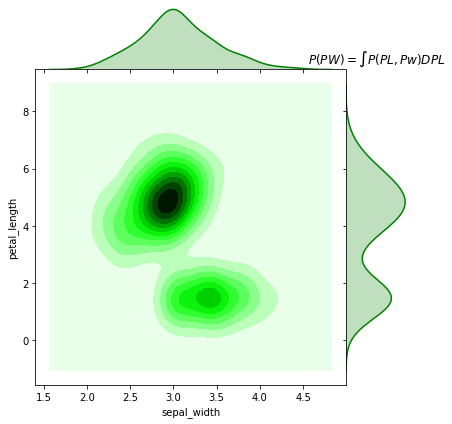

In [169]:
import seaborn as sns
iris = sns.load_dataset("iris")
ax =sns.jointplot("sepal_width", "petal_length", data=iris,kind="kde", space=0, color="g")
#plt.ylabel(r'$P(PL)=\int P(PL, Pw)D Pw$')
plt.title(r'$P(PW)=\int P(PL, Pw)D PL$')
plt.show()

### 5.7.5 Conditional probability distributions

#### 5.7.5.1 Discrete

- Because we can observe part of the system then we have lower uncertainty
    - 2D probability distributuion but only observe one part then it is 1-D.
        - ND $\Rightarrow$ (N-1)D


#### 5.7.5.2 Example: Discrete conditional probability distributions
Question: If you have a Girlfriend what is the probability you go to the Gym?

|     Table | Y:Girlfriend 0        | Y:Girlfriend 1  |
| ------------- |:-------------:| ------:|
| X:Gym 0     | .1 | .3 |
|X:Gym 1     | .4     |  .2|

$$Pr(x=1|y=1) = \frac{Pr(x=1|y=1)}{Pr(y=1)} = \frac{.2}{Pr(x=1,y=1)+Pr(x=0,y=1)}  \frac{.2}{.2+.3}$$

#### 5.7.5.3 Python example: Continuous conditional probability distributions

- What is the probability distribution for petal length if petal width 3.0
- $P(PW|PL=3.00)=\frac{(PL|PW=3.0)}{(PW=3.0)}$
    - Where the denominator is the marginal distribution
    
    
*Reference: Lambert, Ben. [A Student's Guide to Bayesian Statistics](https://www.youtube.com/playlist?list=PLwJRxp3blEvZ8AKMXOy0fc0cqT61GsKCG)*


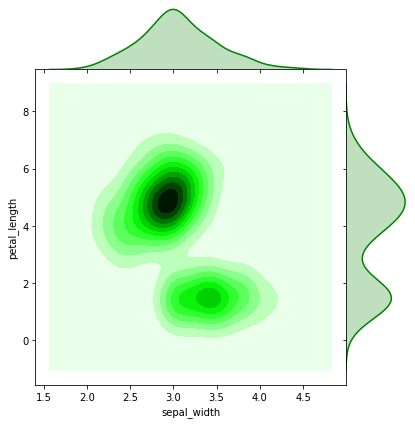

In [170]:
ax =sns.jointplot("sepal_width", "petal_length", data=iris, kind="kde", space=0, color="g")